## PCA 살펴보기

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Load Heart Disease Data

In [2]:
hd = pd.read_csv("./data/heart.csv")

print("데이터 행:{}, 열:{}".format(hd.shape[0],hd.shape[1]))
hd.head(5)

데이터 행:303, 열:14


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


##### 결측치 확인

In [3]:
hd.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

상관계수를 구해보도록 한다
<br>
<br>
**만약!! 그래프가 윗부분이 잘라질 경우**
<br>
Unfortunately matplotlib 3.1.1 broke seaborn heatmaps; and in general inverted axes with fixed ticks.  
This is fixed in the current development version; you may hence

revert to matplotlib 3.1.0
use matplotlib 3.1.2 or higher

<AxesSubplot:>

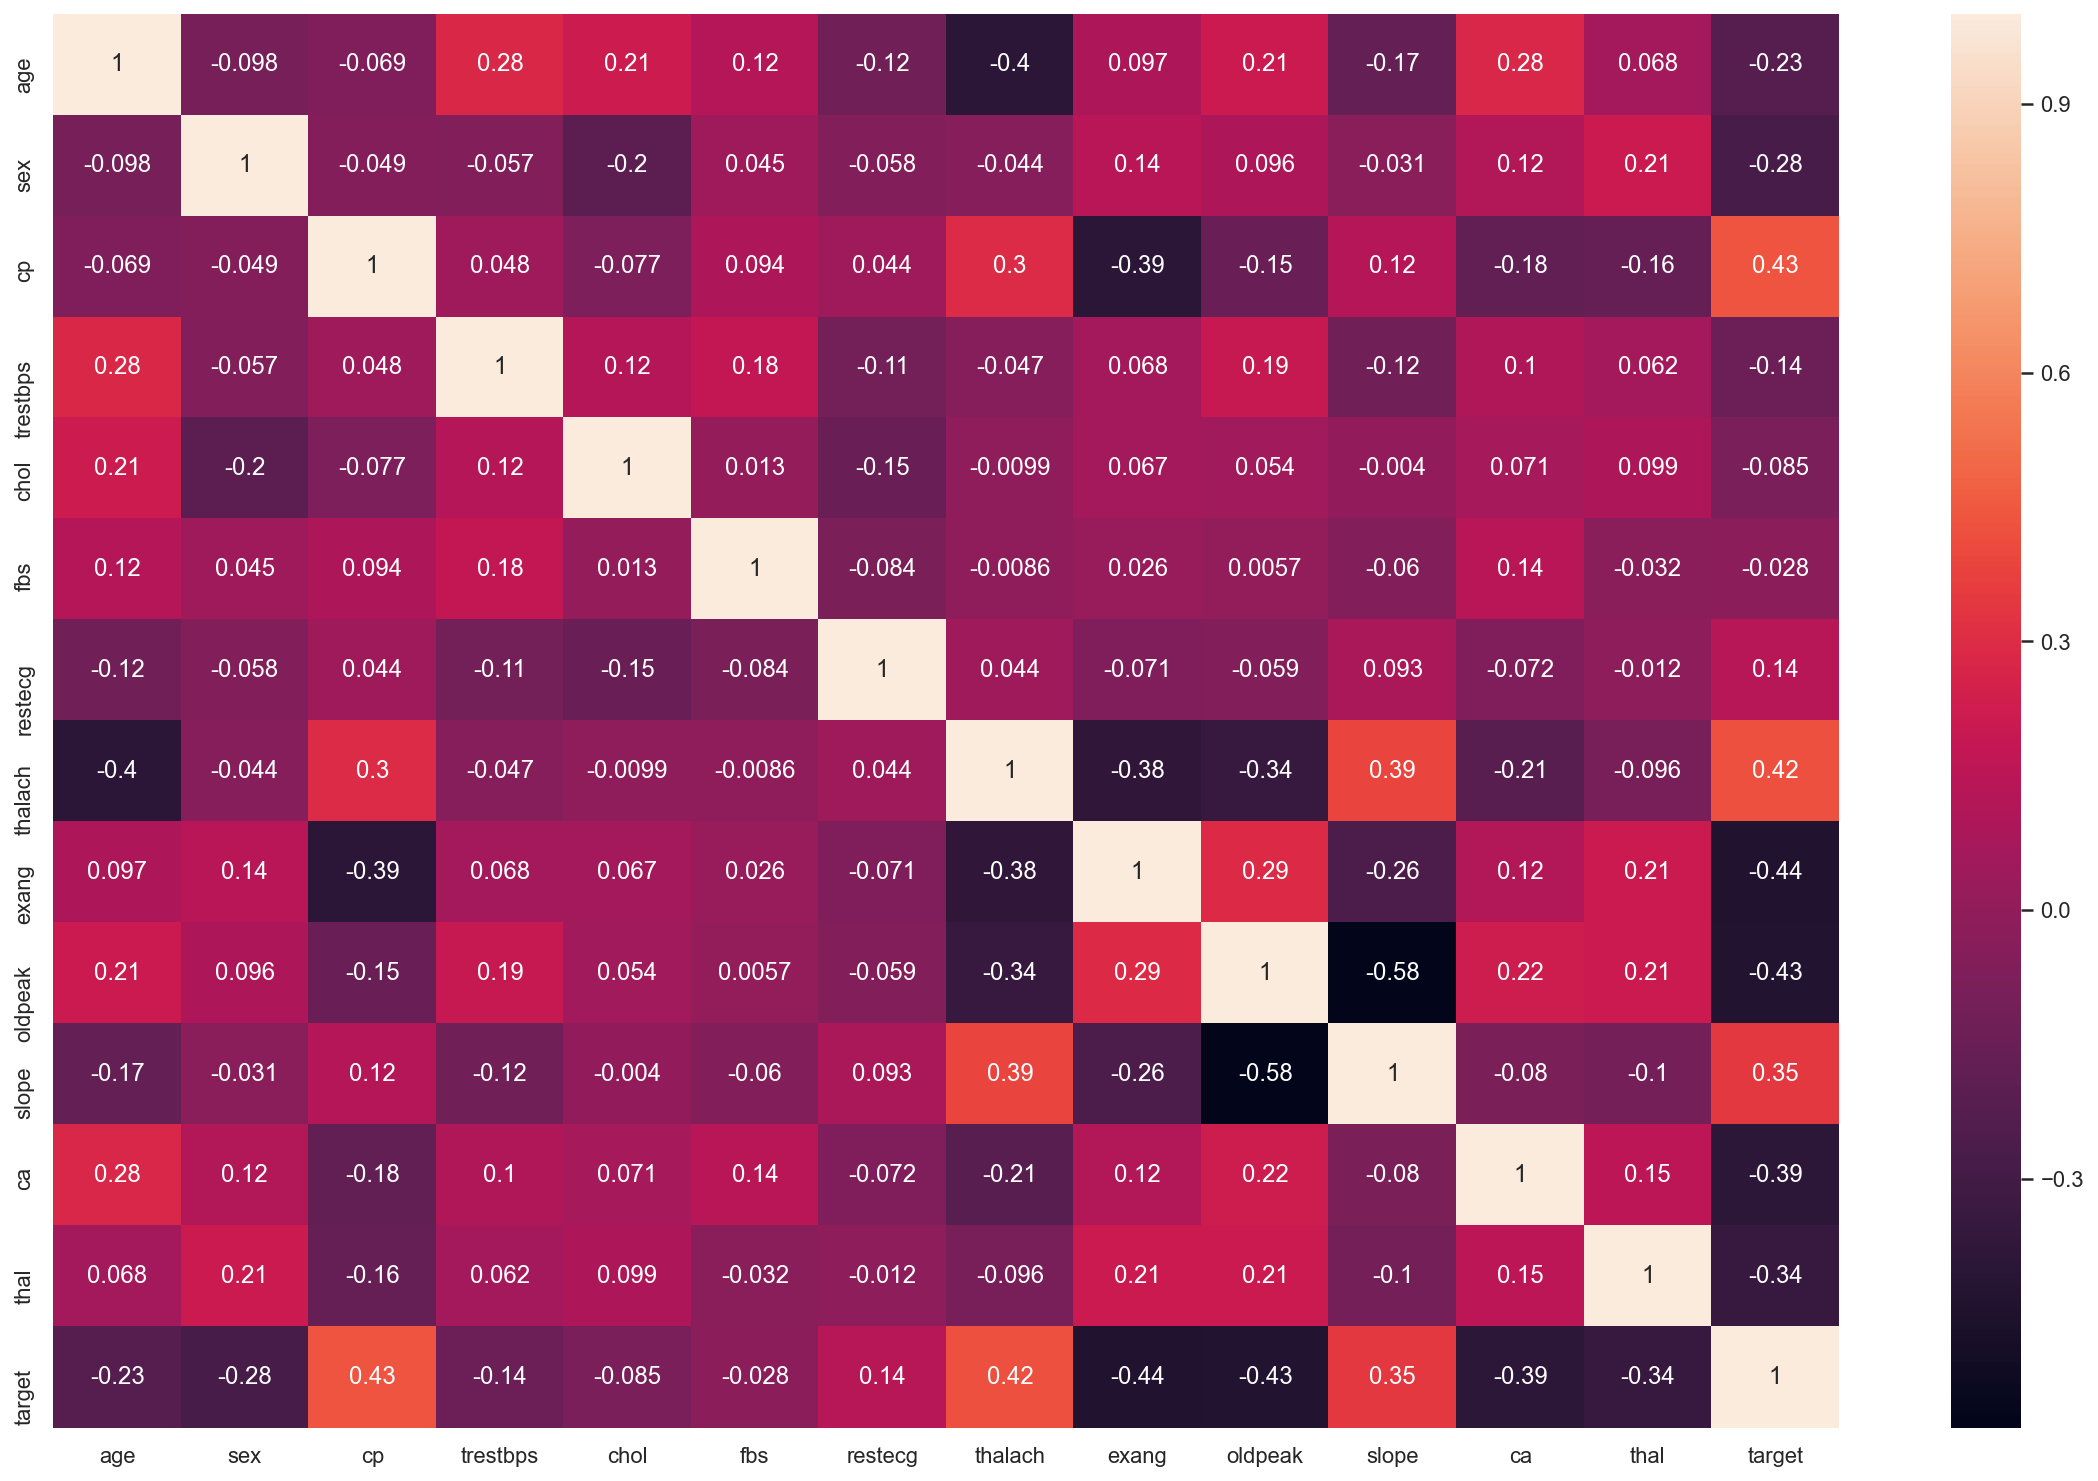

In [6]:
corr = hd.corr()
plt.figure(figsize=(20, 13))
sns.heatmap(corr, annot=True)
 # annot = True 를 해주어서 상관계수의 대략적인 크기 까지 나타내준다

보기 불편하니 좀 더 직관적으로 들어오게 다른 plot 을 그려주어보자

In [7]:
hd_drop_target = hd.drop(['target'], axis = 1 )
hd_target = hd['target']

<AxesSubplot:>

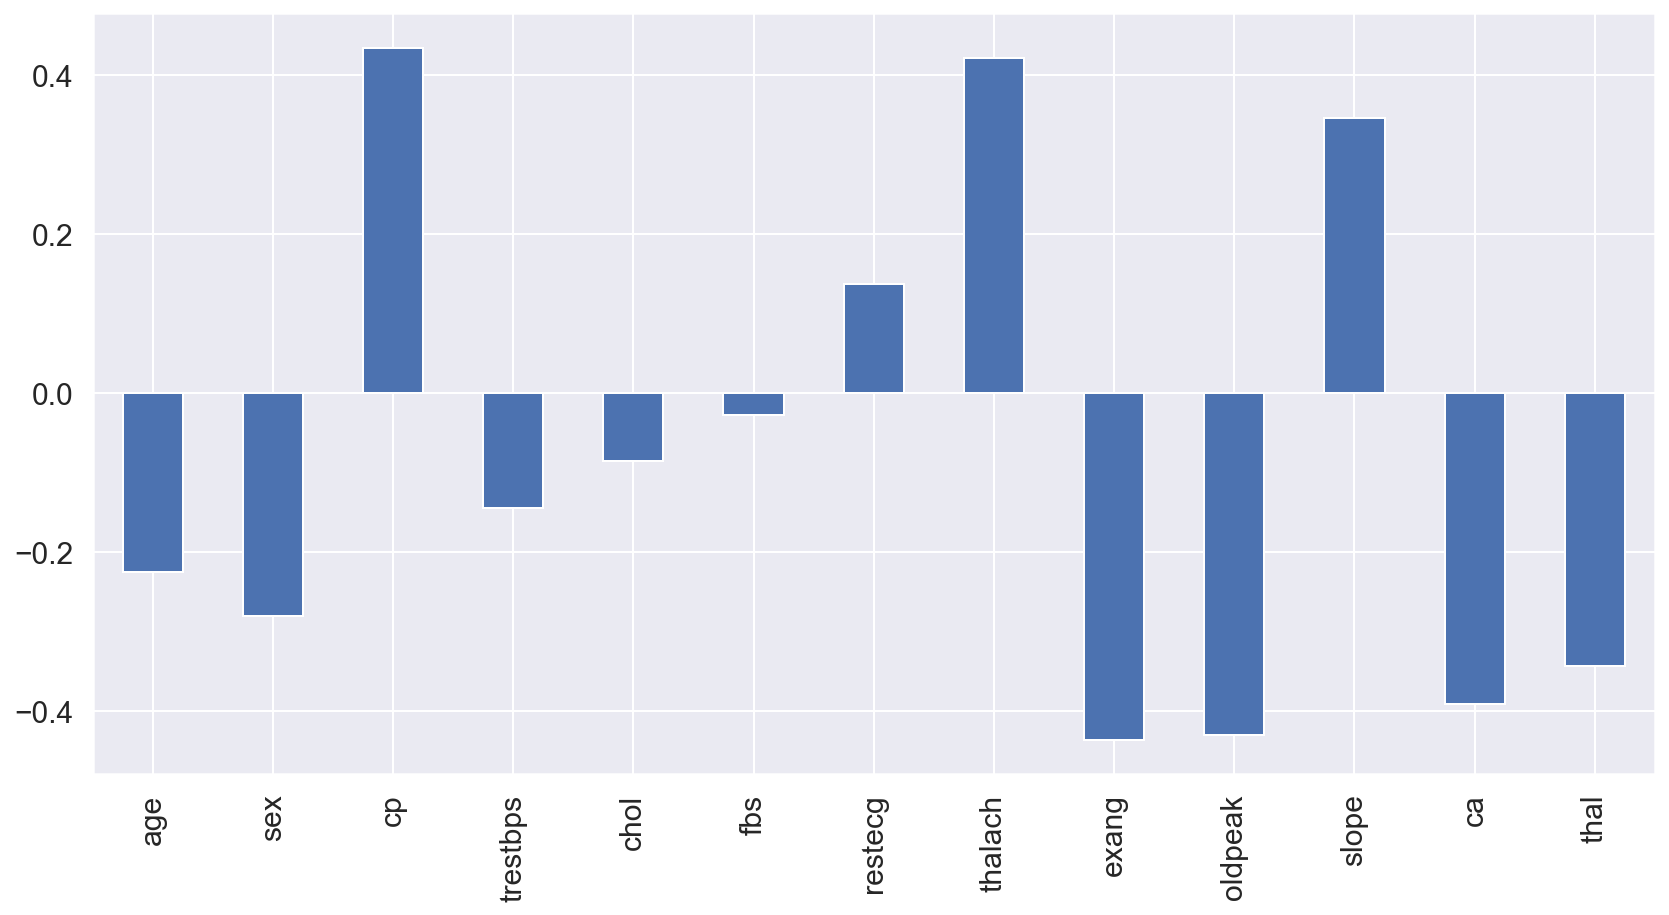

In [9]:
# bar chart
hd_drop_target.corrwith(hd_target).plot.bar(figsize=(14, 7), fontsize = 15)

#### PCA 를 이용해 주성분 분석을 수행하여 새로운 component 를 만들도록 한다

In [11]:
from sklearn.decomposition import PCA
# components 수는 임의로 정한다
# 먼저 elbow point 를 알아보기 위한 plot 을 그려준 후 다시 PCA 를 설정하도록 한다
n = 5
pca = PCA(n_components=5) 
pca_result = pca.fit_transform(hd_drop_target.values) # hd_drop_target.values = hd_drop_target 의 데이터 값

In [14]:
x

[1, 2, 3, 4, 5]

In [15]:
pca

PCA(n_components=5)

elbow point 는 component 가 2일때로 정함


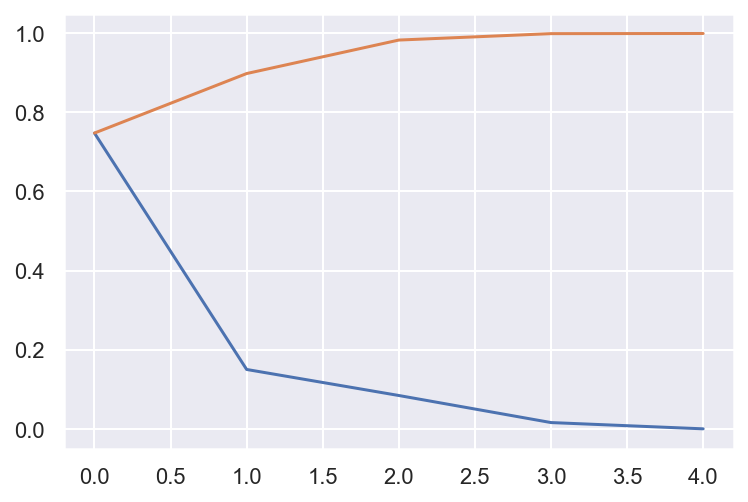

In [13]:
# explained_variance_ratio_ = Percentage of variance explained by each of the selected components.

x = [i for i in range(1, n+1)]

plt.plot(pca.explained_variance_ratio_)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
print('elbow point 는 component 가 2일때로 정함')

**explained_variance_ndarray of shape (n_components,)**

The amount of variance explained by each of the selected components. The variance estimation uses n_samples - 1 degrees of freedom.
Equal to n_components largest eigenvalues of the covariance matrix of X.



pca.explained_variance_ratio는 분산이다. <br>
지금 우리는 주성분을 5개로 설정했다. <br>

0 : 첫번째 주성분의 분산 y값. 약, 0.75? 대응되는 eigenvalues에 일치한다.<br>
1 : 첫번째 주성분의 분산 y값. 약, 0.19? <br>

위 그래프의 경사가 완만하다는 것은, 그렇게 많이 변하지 않는다는 것. 즉, 각각의 두 eigen vector 중에 뭘 해도 크게 차이가 나는건 아니라는 뜻. 
*현업에서는 저 급작스럽게 꺾이는 부분(뭔가 미분불가능한 점처럼 보이는 그 부분) 거기를 component 갯수로 정한다. 그것을 elbow point라고 부른다.*

다만 Component 수의 선택은 굉장히 주관적인 영역이다. 이 원칙에 대해서도 많은 논문들이 있다. 

여기서는 2 혹은 4로 하는 것. 

PCA 의 Component 는 2개로 결정하였다.

In [16]:
# PCA 재실행
pca = PCA(n_components=2)
pca_result = pca.fit_transform(hd_drop_target)

In [17]:
# pca.components_ 수만큼 주성분 번호 할당
dimensions = ['Components {}'.format(i) for i in range(len(pca.components_))]
dimensions

['Components 0', 'Components 1']

In [18]:
pca.explained_variance_ratio_

array([0.7475642 , 0.15037022])

##### DataFrame 으로 정리해보자

이게 W 벡터네

In [20]:
pca.components_

array([[ 3.94611190e-02, -1.78278639e-03, -1.53716667e-03,
         4.75880705e-02,  9.98053283e-01,  1.16389852e-04,
        -1.55243101e-03, -7.35838010e-03,  6.31483108e-04,
         1.32988432e-03, -9.99857233e-05,  1.46773705e-03,
         1.18215354e-03],
       [ 1.82186255e-01,  7.93727347e-04, -1.25419057e-02,
         1.03810033e-01, -1.94250905e-02,  4.61971663e-04,
        -1.20213285e-03, -9.77188942e-01,  7.54817512e-03,
         1.79407185e-02, -1.04271838e-02,  1.01095919e-02,
         2.59241726e-03]])

In [19]:
# 주성분 DataFrame 으로 정리
# np.round(pca.components_, 4) => 소숫점 4자리
components = pd.DataFrame(np.round(pca.components_, 4), columns = list(hd_drop_target.keys()))
components.index = dimensions
components

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
Components 0,0.0395,-0.0018,-0.0015,0.0476,0.9981,0.0001,-0.0016,-0.0074,0.0006,0.0013,-0.0001,0.0015,0.0012
Components 1,0.1822,0.0008,-0.0125,0.1038,-0.0194,0.0005,-0.0012,-0.9772,0.0075,0.0179,-0.0104,0.0101,0.0026


[Text(0, 0, 'Components 0'), Text(1, 0, 'Components 1')]

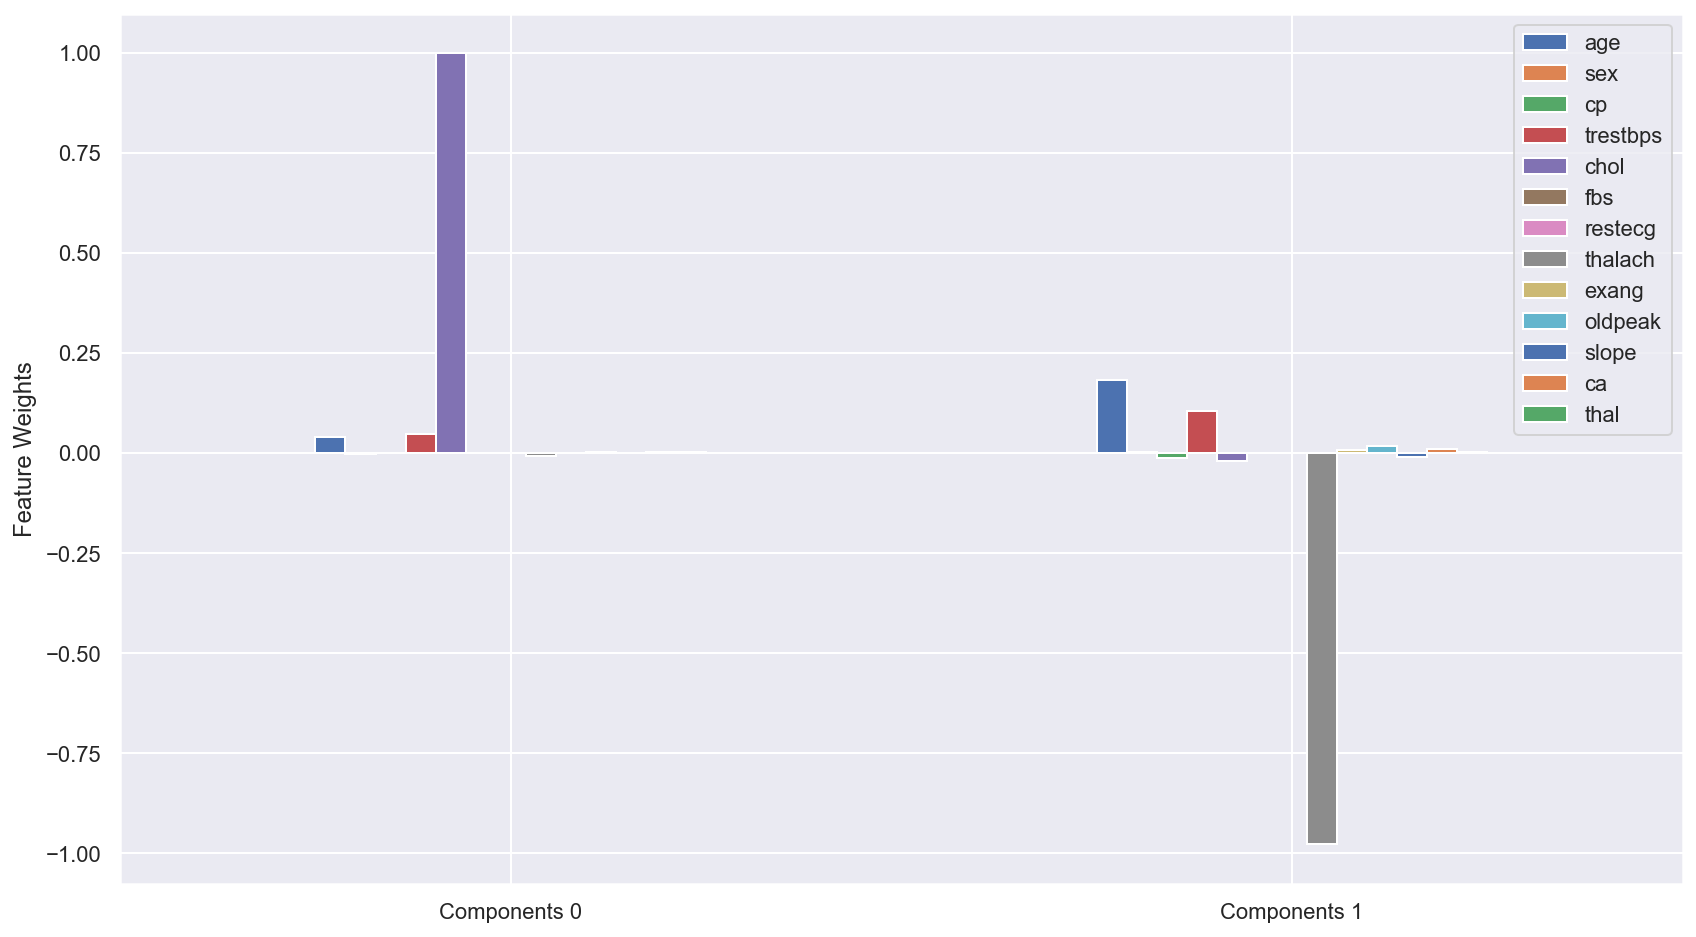

In [21]:
# 주성분들을 plot 을 그리기 위한 fig 설정
_, ax = plt.subplots(figsize = (14,8))

# Plot 그리기
components.plot(ax = ax, kind = 'bar') # bar를 해주지 않으면 각 feature 들이 연결되어서 그려짐,bar를 해주면 히스토그램처럼 그려짐
ax.set_ylabel("Feature Weights")
ax.set_xticklabels(dimensions, rotation=0) # rotation=0 => 글자를 가로로

In [22]:
# PCA 주성분 분산
ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1)
variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['PCA 주성분 분산'])
variance_ratios.index = dimensions # dimensions => ['주성분 1', '주성분 2', '주성분 3']

variance_ratios

,PCA 주성분 분산
Components 0,0.7476
Components 1,0.1504
